# Boxplot of ice thickness observations and gridded model output

In [1]:
#Ben Pelto June 20 2019

import seaborn as sns
import pandas as pd
import pickle 
# from PIL import Image
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import pylab

In [2]:
# path = '/home/pelto/'

path = '/home/pelto/GIS/GPR/ComparisonData/'
path2 = '/home/pelto/oggm_runs/products_opt/'
data = pd.read_csv(path + 'all_comp_final.csv')
# dc =  xr.open_dataset(path2 + 'Conrad/' + 'Conrad_optimized.nc')
# nor_h_25 = Image.open(path + 'nordic_h_25m_gpr_locs_srtm_corr.tif')
# nor_gpr_25 = Image.open(path + 'nordic_gpr_final_25m_test.tif')
# nor_c_200 = Image.open(path + 'nordic_c_200m_gpr_locs_srtm_corr.tif')

In [3]:
data[:5]

,E,N,Z,glacier,source,resolution
0,451413.14631,5.698616e+06,8.752930,Nordic,Clarke,200
1,451613.14631,5.698616e+06,6.357178,Nordic,Clarke,200
2,450813.14631,5.698416e+06,34.104736,Nordic,Clarke,200
3,451213.14631,5.698416e+06,45.496094,Nordic,Clarke,200
4,451413.14631,5.698416e+06,34.597656,Nordic,Clarke,200


This will loop through each glacier's optimized.nc file, open the array, pulls out each distributed thickness (each value in that array) and put it in a table along with the glacier name and source (which I am calling optimized). You can do this for your other dataset you want to add as well, just change the source name! 

In [4]:
glacier= ["Zillmer", "Nordic","Illecillewaet", "Washmawapta", "Haig", "Conrad", "Kokanee"]
glacier_abb = ["Zillmer", "Nordic","Illec.", "W. Wash.", "Haig", "Conrad", "Kokanee"]
count = 0
for G in glacier: 
    #open file by glacier name
    infile = open(path2 + '%s/'%G + '%s_optimized_gprlocs.pkl'%G,'rb')
#     infile2 = open(path2 + '%s/'%G + '%s_regional_gprlocs.pkl'%G,'rb')
    dc = pickle.load(infile)
#     dc2 = pickle.load(infile2)
  
    #remove distriubuted thickness array
    K=np.array(dc)#.distributed_thickness)
#     K2=K=np.array(dc2)
    
    #find where there are values in this array
    IDX= np.ma.where(K > 0, )
#     IDX2= np.ma.where(K2 > 0, )
    
    # pull out each value and save it in the dataframe called data
    for i in np.arange(0,len(IDX[0])):
        V=K[IDX[0][i]][IDX[1][i]]
        
#     for i in np.arange(0,len(IDX2[0])):
#         V2=K2[IDX2[0][i]][IDX2[1][i]]
    
        data=data.append({'Z': V,'glacier':glacier_abb[count],'source':'Optimized'},ignore_index=True)
#         data=data.append({'Z': V2,'glacier':glacier_abb[count],'source':'Regional'},ignore_index=True)

    count+=1

/home/pelto/anaconda2/envs/oggm_pub/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


In [5]:
count = 0
for G in glacier: 
    #open file by glacier name
    infile2 = open(path2 + '%s/'%G + '%s_regional_gprlocs.pkl'%G,'rb')
    dc2 = pickle.load(infile2)
        
    #remove distriubuted thickness array
    K2=K=np.array(dc2)

    #find where there are values in this array
    IDX2= np.ma.where(K2 > 0, )
    
    # pull out each value and save it in the dataframe called data
    for i in np.arange(0,len(IDX2[0])):
        V2=K2[IDX2[0][i]][IDX2[1][i]]
    
        data=data.append({'Z': V2,'glacier':glacier_abb[count],'source':'Regional'},ignore_index=True)

    count+=1

/home/pelto/anaconda2/envs/oggm_pub/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()


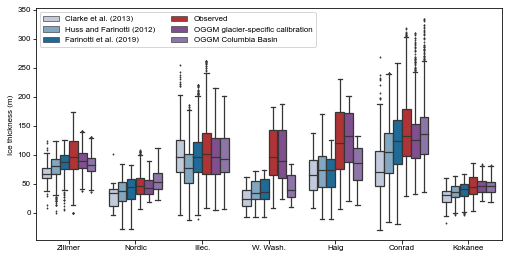

In [6]:
font = {'family' : 'Arial', 'weight' : 'normal', 'size'   : 8}

plt.rc('font', **font)
pylab.rcParams['xtick.major.pad']='1.'
pylab.rcParams['ytick.major.pad']='1.'

fig, ax = plt.subplots(figsize=(7, 3.5)) #(10, 8))

# sns.set(style="ticks", font='arial', fontsize=8)#, font_scale=1.5)

colors = ['#bdc9e1', '#74a9cf', '#0570b0', '#cb181d', '#88419d', '#8c6bb1'] #, '#8c96c6']

ax = sns.boxplot(x=data.glacier, y=data.Z, hue=data.source, palette=colors, hue_order= ['Clarke', 'Huss', 
            'Farinotti', 'Obs.', 'Optimized', 'Regional'], order=["Zillmer", "Nordic","Illec.", "W. Wash.", "Haig",
                "Conrad", "Kokanee"], saturation=0.7, linewidth=1.25, fliersize=1)
ds=data.source
# ax.legend((ds.Clarke'], ds['Huss'], ds['Farinotti'], ds['Obs.'], ds['optimized'], ds['Optimized']),('Clarke 2013', 'Huss 2012', 'Farinotti 2019', 'Obs.', 'Optimized', 'Basin'), ncol = 3, loc = 'best') 


leg = ax.legend(ncol = 2, loc = 2) 
new_labels = ['Clarke et al. (2013)', 'Huss and Farinotti (2012)', 'Farinotti et al. (2019)', 'Observed', 
              'OGGM glacier-specific calibration', 'OGGM Columbia Basin']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
ax.set(xlabel='', ylabel='Ice thickness (m)')
# plt.tight_layout()
fig.subplots_adjust(bottom=0.06, top=0.98, left=0.065, right=0.99)
plt.savefig('/home/pelto/Desktop/ice_thick/JoG/' + 'ice_thickness_boxplot_opt_3p5in-tallNEW.pdf', dpi=300)
plt.show()